In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## KNN with Spotify data

We will be using a KNN model on the Spotify songs data.

In [2]:
# Import the cleaned data set exported from the data_cleaning notebook
# Verify that the changes from cleaning have been saved
df = pd.read_csv("clean-Spotify.csv")
df

,Unnamed: 0,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
3,4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
4,5,6,The Road Ahead (Miles Of The Unknown),City To City,alternative pop rock,2004,99,46,54,-9,14,14,247,0,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1985,1986,Blue Suede Shoes,Elvis Presley,adult standards,1956,95,66,56,-8,14,96,119,65,6,62
1543,1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1544,1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1545,1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


# Classification with kNN

We have decided to try to use a classification model, since our linear regression model showed that a linear approach would not be suitable to modeling this data. We selected KNearestNeighbors as our classification model since we have previous exposure from the course materials and it is relatively straightforward to implement. 


We want to predict **Popularity** using the following features:
   * **Danceability** 
   * **Energy** 
   * **Valence** 
   * **Loudness** 
   * **Speechiness** 
   * **Length** 
   * **Acousticness** 
   * **Beats Per Minute (BPM)**  
   * **Liveness**    

In [3]:
#Set our target column to be popularity
target_col = 'Popularity'

#limit columns of the DF to the song traits we want to examine
df = df[['Popularity','Danceability','Energy','Valence','Loudness','Speechiness','Length','Acousticness','Beats Per Minute (BPM)','Liveness']]

df

,Popularity,Danceability,Energy,Valence,Loudness,Speechiness,Length,Acousticness,Beats Per Minute (BPM),Liveness
0,71,53,30,68,-14,3,201,94,157,11
1,39,50,79,81,-11,7,207,17,135,17
2,76,43,96,37,-4,4,269,0,173,3
3,59,58,82,87,-5,3,256,1,106,10
4,45,54,46,14,-9,2,247,0,99,14
...,...,...,...,...,...,...,...,...,...,...
1542,62,56,66,96,-8,6,119,65,95,14
1543,63,70,21,72,-12,7,128,84,94,11
1544,74,53,80,97,-9,7,162,74,168,31
1545,65,45,26,60,-13,4,324,54,174,7


In [4]:
#Verify the types of the data to be int's
df.dtypes

Popularity                int64
Danceability              int64
Energy                    int64
Valence                   int64
Loudness                  int64
Speechiness               int64
Length                    int64
Acousticness              int64
Beats Per Minute (BPM)    int64
Liveness                  int64
dtype: object

# Normalize the attributes

To make the data suitable for analysis and modeling, we will be normalizing the features to be distributed between 0 and 1. 

In [5]:
dict_normalize = dict()
for col in df.columns:
    if col != target_col:
        dict_normalize[col] = (df[col].min(),df[col].max())
        df[col] = (df[col] - dict_normalize[col][0])/(dict_normalize[col][1]-dict_normalize[col][0])

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:
#verify the normalization happened properly
df

,Popularity,Danceability,Energy,Valence,Loudness,Speechiness,Length,Acousticness,Beats Per Minute (BPM),Liveness
0,71,0.500000,0.265957,0.673684,0.2500,0.2,0.287719,0.949495,0.710059,0.219512
1,39,0.465116,0.787234,0.810526,0.4375,1.0,0.308772,0.171717,0.579882,0.365854
2,76,0.383721,0.968085,0.347368,0.8750,0.4,0.526316,0.000000,0.804734,0.024390
3,59,0.558140,0.819149,0.873684,0.8125,0.2,0.480702,0.010101,0.408284,0.195122
4,45,0.511628,0.436170,0.105263,0.5625,0.0,0.449123,0.000000,0.366864,0.292683
...,...,...,...,...,...,...,...,...,...,...
1542,62,0.534884,0.648936,0.968421,0.6250,0.8,0.000000,0.656566,0.343195,0.292683
1543,63,0.697674,0.170213,0.715789,0.3750,1.0,0.031579,0.848485,0.337278,0.219512
1544,74,0.500000,0.797872,0.978947,0.5625,1.0,0.150877,0.747475,0.775148,0.707317
1545,65,0.406977,0.223404,0.589474,0.3125,0.4,0.719298,0.545455,0.810651,0.121951


# Using sklearn.neighbors.KNeighborsClassifier

We will be using SKLearn's K-Neighbors Classifier to predict to which popularity level a song will be placed into. Because our target variable cannot be continuous, we will bin popularity into three ranges

In [7]:
#Bin the songs by popularity into 3 sections
pd.cut(df['Popularity'], bins=3)

0         (69.0, 98.0]
1       (10.913, 40.0]
2         (69.0, 98.0]
3         (40.0, 69.0]
4         (40.0, 69.0]
             ...      
1542      (40.0, 69.0]
1543      (40.0, 69.0]
1544      (69.0, 98.0]
1545      (40.0, 69.0]
1546      (40.0, 69.0]
Name: Popularity, Length: 1547, dtype: category
Categories (3, interval[float64]): [(10.913, 40.0] < (40.0, 69.0] < (69.0, 98.0]]

In [28]:
#assign the bins labels of "low", "medium", and "high"
pd.cut(df['Popularity'], bins=3, labels = ["low", "medium", "high"]).value_counts()


TypeError: min() takes 1 positional argument but 2 were given

In [9]:
df['Popularity'] = pd.cut(df['Popularity'], bins=3, labels = ["low", "medium", "high"], right = True)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
#Equally bin 169
#randomly sample 169 from data where df['Popularity'] == "medium"
df_medium = df[df['Popularity'] == 'medium'].sample(169)
df_medium

,Popularity,Danceability,Energy,Valence,Loudness,Speechiness,Length,Acousticness,Beats Per Minute (BPM),Liveness
427,medium,0.674419,0.872340,0.000000,0.7500,0.4,0.649123,0.000000,0.538462,0.853659
770,medium,0.418605,0.255319,0.231579,0.5000,0.2,0.273684,0.828283,0.402367,0.390244
128,medium,0.616279,0.297872,0.452632,0.5625,0.2,0.259649,0.747475,0.431953,0.219512
256,medium,0.302326,0.776596,0.568421,0.6250,0.4,0.410526,0.010101,0.295858,0.878049
936,medium,0.406977,0.648936,0.778947,0.6875,0.6,0.589474,0.666667,0.414201,0.585366
...,...,...,...,...,...,...,...,...,...,...
1149,medium,0.581395,0.670213,0.705263,0.4375,0.2,0.487719,0.212121,0.443787,0.682927
430,medium,0.802326,0.297872,0.515789,0.3125,0.8,0.392982,0.606061,0.532544,0.414634
1529,medium,0.511628,0.712766,0.452632,0.5625,0.4,0.217544,0.020202,0.514793,0.585366
164,medium,0.453488,0.606383,0.042105,0.6875,0.2,0.526316,0.020202,0.467456,0.268293


In [11]:
#Equally bin 169
#randomly sample 169 from data where df['Popularity'] == "low"
df_low = df[df['Popularity'] == 'low'].sample(169)
df_low

,Popularity,Danceability,Energy,Valence,Loudness,Speechiness,Length,Acousticness,Beats Per Minute (BPM),Liveness
296,low,0.209302,0.329787,0.305263,0.3125,0.4,0.301754,0.616162,0.958580,0.292683
145,low,0.406977,0.595745,0.463158,0.6875,0.2,0.315789,0.020202,0.786982,0.170732
559,low,0.465116,0.372340,0.115789,0.5625,0.2,0.371930,0.343434,0.520710,0.243902
561,low,0.348837,0.276596,0.284211,0.6250,0.2,0.501754,0.929293,0.390533,0.243902
956,low,0.593023,0.372340,0.705263,0.1875,0.2,0.438596,0.101010,0.402367,0.073171
...,...,...,...,...,...,...,...,...,...,...
74,low,0.500000,0.808511,0.178947,0.8750,0.2,0.656140,0.000000,0.443787,0.341463
26,low,0.255814,0.808511,0.084211,0.6875,0.6,0.291228,0.080808,0.680473,0.317073
1413,low,0.465116,0.127660,0.221053,0.1250,0.2,0.505263,0.959596,0.236686,0.292683
114,low,0.534884,0.436170,0.157895,0.6875,0.2,0.442105,0.727273,0.514793,0.195122


In [12]:
#Equally bin 169
#randomly sample 169 from data where df['Popularity'] == "high"
df_high = df[df['Popularity'] == 'high'].sample(169)
df_high

,Popularity,Danceability,Energy,Valence,Loudness,Speechiness,Length,Acousticness,Beats Per Minute (BPM),Liveness
261,high,0.686047,0.436170,0.715789,0.6250,0.6,0.431579,0.606061,0.674556,0.219512
1219,high,0.639535,0.276596,0.389474,0.3750,0.2,0.645614,0.535354,0.449704,0.243902
1491,high,0.372093,0.744681,0.789474,0.5000,0.6,0.094737,0.202020,0.313609,0.365854
161,high,0.523256,0.808511,0.115789,0.8125,0.2,0.585965,0.020202,0.402367,0.195122
821,high,0.825581,0.436170,0.736842,0.3125,0.2,0.252632,0.787879,0.331361,0.317073
...,...,...,...,...,...,...,...,...,...,...
448,high,0.546512,0.648936,0.421053,0.8125,0.6,0.431579,0.636364,0.544379,0.243902
407,high,0.406977,0.755319,0.400000,0.8125,0.2,0.519298,0.020202,0.390533,0.317073
1227,high,0.511628,0.372340,0.210526,0.5000,0.4,0.596491,0.585859,0.686391,0.341463
469,high,0.720930,0.414894,0.294737,0.5625,0.2,0.435088,0.585859,0.550296,0.170732


In [13]:
#Merge the low and med DFs
df_med_low = df_medium.append(df_low)

In [14]:
#Merge high df to rest.
df_equal_distrib = df_med_low.append(df_high)

In [15]:
df = df_equal_distrib

In [16]:
#Create the target dataframe Y and check the percentage of low medium high
y = df['Popularity']
y.value_counts()/y.count()

low       0.333333
medium    0.333333
high      0.333333
Name: Popularity, dtype: float64

In [17]:
#Create the X datframe without the target variable
X = df[['Danceability','Energy','Valence','Loudness','Speechiness','Length','Acousticness','Beats Per Minute (BPM)','Liveness']]
X

,Danceability,Energy,Valence,Loudness,Speechiness,Length,Acousticness,Beats Per Minute (BPM),Liveness
427,0.674419,0.872340,0.000000,0.7500,0.4,0.649123,0.000000,0.538462,0.853659
770,0.418605,0.255319,0.231579,0.5000,0.2,0.273684,0.828283,0.402367,0.390244
128,0.616279,0.297872,0.452632,0.5625,0.2,0.259649,0.747475,0.431953,0.219512
256,0.302326,0.776596,0.568421,0.6250,0.4,0.410526,0.010101,0.295858,0.878049
936,0.406977,0.648936,0.778947,0.6875,0.6,0.589474,0.666667,0.414201,0.585366
...,...,...,...,...,...,...,...,...,...
448,0.546512,0.648936,0.421053,0.8125,0.6,0.431579,0.636364,0.544379,0.243902
407,0.406977,0.755319,0.400000,0.8125,0.2,0.519298,0.020202,0.390533,0.317073
1227,0.511628,0.372340,0.210526,0.5000,0.4,0.596491,0.585859,0.686391,0.341463
469,0.720930,0.414894,0.294737,0.5625,0.2,0.435088,0.585859,0.550296,0.170732


In [18]:
#Create a count of popularity values
pop_count = df['Popularity'].value_counts()

In [19]:
!pip install imblearn

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [20]:
#Create the KN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [21]:
#create the Y predictions from the KNN model
y_pred_class = knn.predict(X)

# compute classification accuracy
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred_class))

1.0


Here, we can see that the accuracy being 1 is a sign of overfitting the data. 

In order to address this, we will try re-splitting the data into different test/train splits to try and refit the data. We'll be trying a split of .5 and .3 to see how the accuracy is affected.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.5)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.28346456692913385


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.33986928104575165


Thankfully, this newly split data showed that the model returned reasonable accuracy scores. We now have the confidence to move forward with the model by testing it on the full range of K-values. 

In [24]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 200)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.2966599597585513, 0.33621730382293763, 0.35038229376257546, 0.3786317907444668, 0.38426559356136825, 0.37026156941649896, 0.39553319919517105, 0.3673239436619718, 0.3956941649899396, 0.3928772635814889, 0.4097786720321931, 0.38720321931589535, 0.3787927565392354, 0.4041448692152917, 0.3900603621730382, 0.39279678068410456, 0.40116700201207245, 0.39847082494969815, 0.4097786720321932, 0.3927967806841047, 0.3985513078470825, 0.40981891348088534, 0.4322334004024144, 0.426599597585513, 0.41251509054325963, 0.40394366197183096, 0.3926760563380281, 0.40112676056338026, 0.3785110663983903, 0.3898189134808853, 0.39549295774647886, 0.40112676056338026, 0.39549295774647886, 0.40410462776659956, 0.3899798792756539, 0.3927967806841046, 0.39839034205231394, 0.4040643863179074, 0.40973843058350107, 0.41255533199195166, 0.4323138832997988, 0.4379476861167002, 0.42945674044265597, 0.41537223340040236, 0.4096981891348088, 0.41239436619718306, 0.41521126760563376, 0.4209255533199195, 0.42937625754527

In [25]:
# Consolidate our K scores
k_dict=dict(zip(k_range,k_scores))
k_dict

{1: 0.2966599597585513,
 2: 0.33621730382293763,
 3: 0.35038229376257546,
 4: 0.3786317907444668,
 5: 0.38426559356136825,
 6: 0.37026156941649896,
 7: 0.39553319919517105,
 8: 0.3673239436619718,
 9: 0.3956941649899396,
 10: 0.3928772635814889,
 11: 0.4097786720321931,
 12: 0.38720321931589535,
 13: 0.3787927565392354,
 14: 0.4041448692152917,
 15: 0.3900603621730382,
 16: 0.39279678068410456,
 17: 0.40116700201207245,
 18: 0.39847082494969815,
 19: 0.4097786720321932,
 20: 0.3927967806841047,
 21: 0.3985513078470825,
 22: 0.40981891348088534,
 23: 0.4322334004024144,
 24: 0.426599597585513,
 25: 0.41251509054325963,
 26: 0.40394366197183096,
 27: 0.3926760563380281,
 28: 0.40112676056338026,
 29: 0.3785110663983903,
 30: 0.3898189134808853,
 31: 0.39549295774647886,
 32: 0.40112676056338026,
 33: 0.39549295774647886,
 34: 0.40410462776659956,
 35: 0.3899798792756539,
 36: 0.3927967806841046,
 37: 0.39839034205231394,
 38: 0.4040643863179074,
 39: 0.40973843058350107,
 40: 0.412555331

In [26]:
#Find the K value with the highest 
max(k_dict, key= k_dict.get)

66

Text(0, 0.5, 'K_Score')

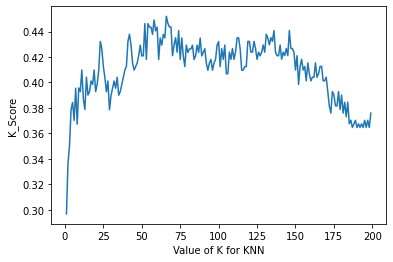

In [27]:
# Plot the k scores against the K values
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('K_Score')

Using the Elbow method, we see the accuracy score increase and then stabilize around K=66, which we deemed the "elbow". Thus, K=66 is the optimal K at the beginning of the stable zone. With K=66 as our K mean, our accuracy score is 0.4521. This is much better than our regression model, which means that we can predict popularity as 3 categories much better with KNN classification. However, there is still significant margin for error. The accuracy of our final KNN model exceeds our expectation of 40%.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ebc7ed57-9d9b-4197-9f19-b17d7bdf5e26' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>